# Apply the trained model

Take a batch file of sample points where the GSV images have been cached, and apply the model to detect the required objects and log where they were found.

## Configuration

In [1]:
locality           = 'Mount Eliza Sample'
margin             = 20

trained_model_name = 'centernet_hg104_512x512_coco17_tpu-8'

## Load and configure model

In [2]:
import os
import sys
from ipyleaflet import Map, GeoJSON


# Make sure local modules can be imported
module_path_root = os.path.abspath(os.pardir)
if module_path_root not in sys.path:
    sys.path.append(module_path_root)
    
# Import local modules
import tf2_utils.tf2_model_wrapper as tf2_model_wrapper
import osm_gsv_utils.detection_map as detection_map

%matplotlib inline

In [3]:
# Change to parent directory from "jupyter" notebook folder
os.chdir(os.pardir)

output_locality    = locality.replace(' ', '_') + '_' + str(margin) + 'm'
download_directory = os.path.join(module_path_root, 'data_sources', 'gsv')
batch_filename     = os.path.join(module_path_root, 'batches', output_locality + '.csv')
output_geojson     = os.path.join(module_path_root, 'detections', output_locality, 'detected_points.geojson')

In [4]:
# Initialise model
model_wrapper = tf2_model_wrapper(locality, margin, download_directory, trained_model_name)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Output directory for detections: detections\Mount_Eliza_Sample_20m
Latest Checkpoint: ckpt-27


## Model Application

Input path:  D:\TensorFlow2\TFODCourse\minor_thesis\data_sources\gsv\-38.166796\145.101754\177\gsv_0.jpg
Output path: detections\Mount_Eliza_Sample_20m\-38.166796_145.101754_177.jpg
Instructions for updating:
Use `tf.cast` instead.
num_detections_threshold: 1
Detection box:            0.73774624 [0.42896956 0.31630668 0.45366538 0.37599835]
Writing: detections\Mount_Eliza_Sample_20m\-38.166796_145.101754_177.jpg


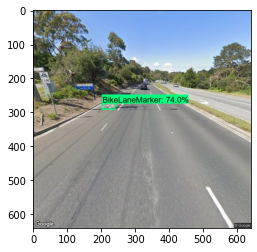

In [5]:
# Test detection for an example image that we have already fetched
model_wrapper.apply_model(
    -38.166796,
    145.101754,
    177,
    204762389,
    30204323,
    10,
    write   = True,
    display = True,
    log     = True,
    verbose = True
)

In [6]:
# Run detection for entire batch
detection_log = model_wrapper.process_batch_file(batch_filename, progress=True, verbose=False)

  0%|          | 0/752 [00:00<?, ?it/s]

## Convert detections to points on map

In [7]:
dm = detection_map(detection_log)

dm.write_geojson(output_geojson, mode='Point', progress=True)

  0%|          | 0/41 [00:00<?, ?it/s]

Writing to: D:\TensorFlow2\TFODCourse\minor_thesis\detections\Mount_Eliza_Sample_20m\detected_points.geojson


In [8]:
print(detection_log)

detections\Mount_Eliza_Sample_20m\detection_log.csv
